# Irdina Iskandar

## Research question/interests

**Are there any lifestyle factors that are particularly relevant for certain demographic groups, as noted by the correlation of factors within their group and work-life balance?** 

While there are many factors impacting one’s work-life balance and wellbeing, there might be systematic patterns between demographic groups that makes a lifestyle factor prevail from the rest. I plan on answering this research question by observing descriptive statistics of lifestyle factors among different demographic groups and obtain correlation value for these factors. Then compare the correlations to work-life balance. 

### Analysis Plan
After filtering the data for any NAs, I would subset the data to remove the timestamp column as it is irrelevant to my research question. Then I would observe the variables at a general level first. I would observe the counts for both quantitative and categorical variables. Since I am looking at age and gender, I would observe their spread through a boxplot to see if there are any visible outliers. 

Then I would group the data by age and gender to see their counts relative to the different lifestyle factors. I would also observe the descriptive statistics of the demographic factors. Then, I will plot a heatmap of the correlations of all lifestyle factors and observe the correlations with work-life balance in all individuals. This acts as a baseline of comparison.

Then I will plot heatmaps for each category of demographic variable to see how the correlation values differ. I can observe which of them correlate the most strongly with work-life balance scores.


### Loading Data

In [ ]:
    # Importing necessary packages
    import pandas as pd
    import numpy as np
    import matplotlib.pylab as plt
    import seaborn as sns 

In [ ]:
data = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


#### Notes
I have refined my research question and summary above. The rest of the steps for Milestone 3 will be down below

## Milestone 3

#### Explore Data

In [ ]:
data.shape

# this dataset has 15972 rows and 24 columns

(15972, 24)

In [ ]:
data.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [ ]:
data.dropna(axis = 0)
data = data.drop(columns = 'Timestamp')

# The column 'Timestamp' is irrelevant to our exploration goals
# There are also no NA values, therefore I omitted the need to re-index

In [ ]:
# Obtain a general summary statistic table for the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,15972.0,5.232970,3.311912,0.0,2.0,5.0,8.0,10.0
CORE_CIRCLE,15972.0,5.508077,2.840334,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,15972.0,5.616454,3.242021,0.0,3.0,5.0,10.0,10.0
SOCIAL_NETWORK,15972.0,6.474267,3.086672,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,15972.0,4.000751,2.755837,0.0,2.0,3.0,6.0,10.0
DONATION,15972.0,2.715314,1.851586,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0
FLOW,15972.0,3.194778,2.357518,0.0,1.0,3.0,5.0,10.0


In [ ]:
# rename categories
data['AGE'] = data['AGE'].astype('category')
data["AGE"] = data["AGE"].cat.rename_categories(['21-35', '36-50', '> 50', '< 20'])
data['AGE'].value_counts()

21-35    6108
36-50    4655
> 50     3390
< 20     1819
Name: AGE, dtype: int64

In [ ]:
# Group by gender and age to obtain descriptive statistics
dtaGroup = data.groupby(by=['GENDER', 'AGE'])
dtaGroup.describe().T

GENDER                              Female                            \
AGE                                  21-35        36-50         > 50   
FRUITS_VEGGIES          count  3541.000000  2961.000000  2291.000000   
                        mean      2.816718     3.103343     3.472719   
                        std       1.400368     1.387733     1.375558   
                        min       0.000000     0.000000     0.000000   
                        25%       2.000000     2.000000     2.000000   
...                                    ...          ...          ...   
WORK_LIFE_BALANCE_SCORE min     480.000000   497.000000   496.100000   
                        25%     634.100000   638.800000   648.000000   
                        50%     663.400000   670.500000   679.800000   
                        75%     693.200000   700.300000   710.200000   
                        max     787.500000   794.300000   802.600000   

GENDER                                             Male               \
AGE                                   < 20        21-35        36-50   
FRUITS_VEGGIES          count  1065.000000  2567.000000  1694.000000   
                        mean      2.748357     2.518115     2.833530   
                        std       1.424992     1.454547     1.435985   
                        min       0.000000     0.000000     0.000000   
                        25%       2.000000     1.000000     2.000000   
...                                    ...          ...          ...   
WORK_LIFE_BALANCE_SCORE min     522.000000   480.000000   521.500000   
                        25%     635.200000   628.800000   628.925000   
                        50%     665.600000   660.500000   663.900000   
                        75%     695.300000   690.400000   697.700000   
                        max     777.100000   804.300000   820.200000   

GENDER                                                  
AGE                                   > 50        < 20  
FRUITS_VEGGIES          count  1099.000000  754.000000  
                        mean      3.139217    2.547745  
                        std       1.376256    1.481529  
                        min       0.000000    0.000000  
                        25%       2.000000    1.000000  
...                                    ...         ...  
WORK_LIFE_BALANCE_SCORE min     480.000000  480.000000  
                        25%     644.600000  633.100000  
                        50%     680.500000  666.550000  
                        75%     705.750000  695.100000  
                        max     814.500000  818.300000  

[160 rows x 8 columns]

Text(0.5, 1.0, 'Frequency of Demographic Variables - Age and Gender')

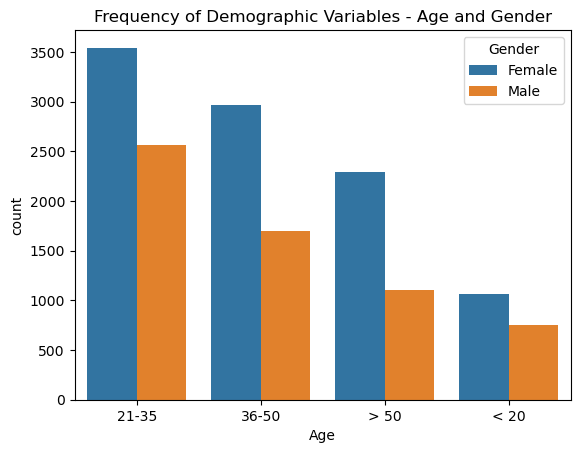

In [ ]:
# Observe count of our 2 demographic variables of interest
data['GENDER'].value_counts()
plot = sns.countplot(data = data, x = 'AGE', hue = 'GENDER').set(xlabel = "Age")
plt.legend(title = 'Gender')
plt.title('Frequency of Demographic Variables - Age and Gender')


#### Observations
* The age range with the highest frequency is 21-35 years old
* Both genders display similar patterns of count across age, but males at a lower frequency in general

Text(0, 0.5, 'Age')

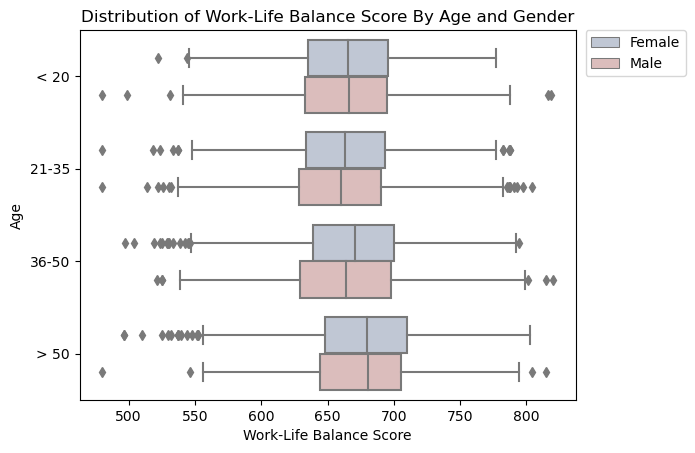

In [ ]:
# Visualize spread of demographic factors through boxplot
sns.boxplot(data = data, x = "WORK_LIFE_BALANCE_SCORE", y = "AGE",order = ['< 20', '21-35', '36-50', '> 50'], palette = "vlag", hue = "GENDER")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Distribution of Work-Life Balance Score By Age and Gender')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Age')

#### Observations
* For the < 20 age group, the outliers for males may be of concern, especially on the right end of the boxplot
* There are many outliers on the lower end of work-life balance scores for the 36-50 and > 50 age group females

Text(0.5, 0.98, 'Histogram of Variables in the Dataset')

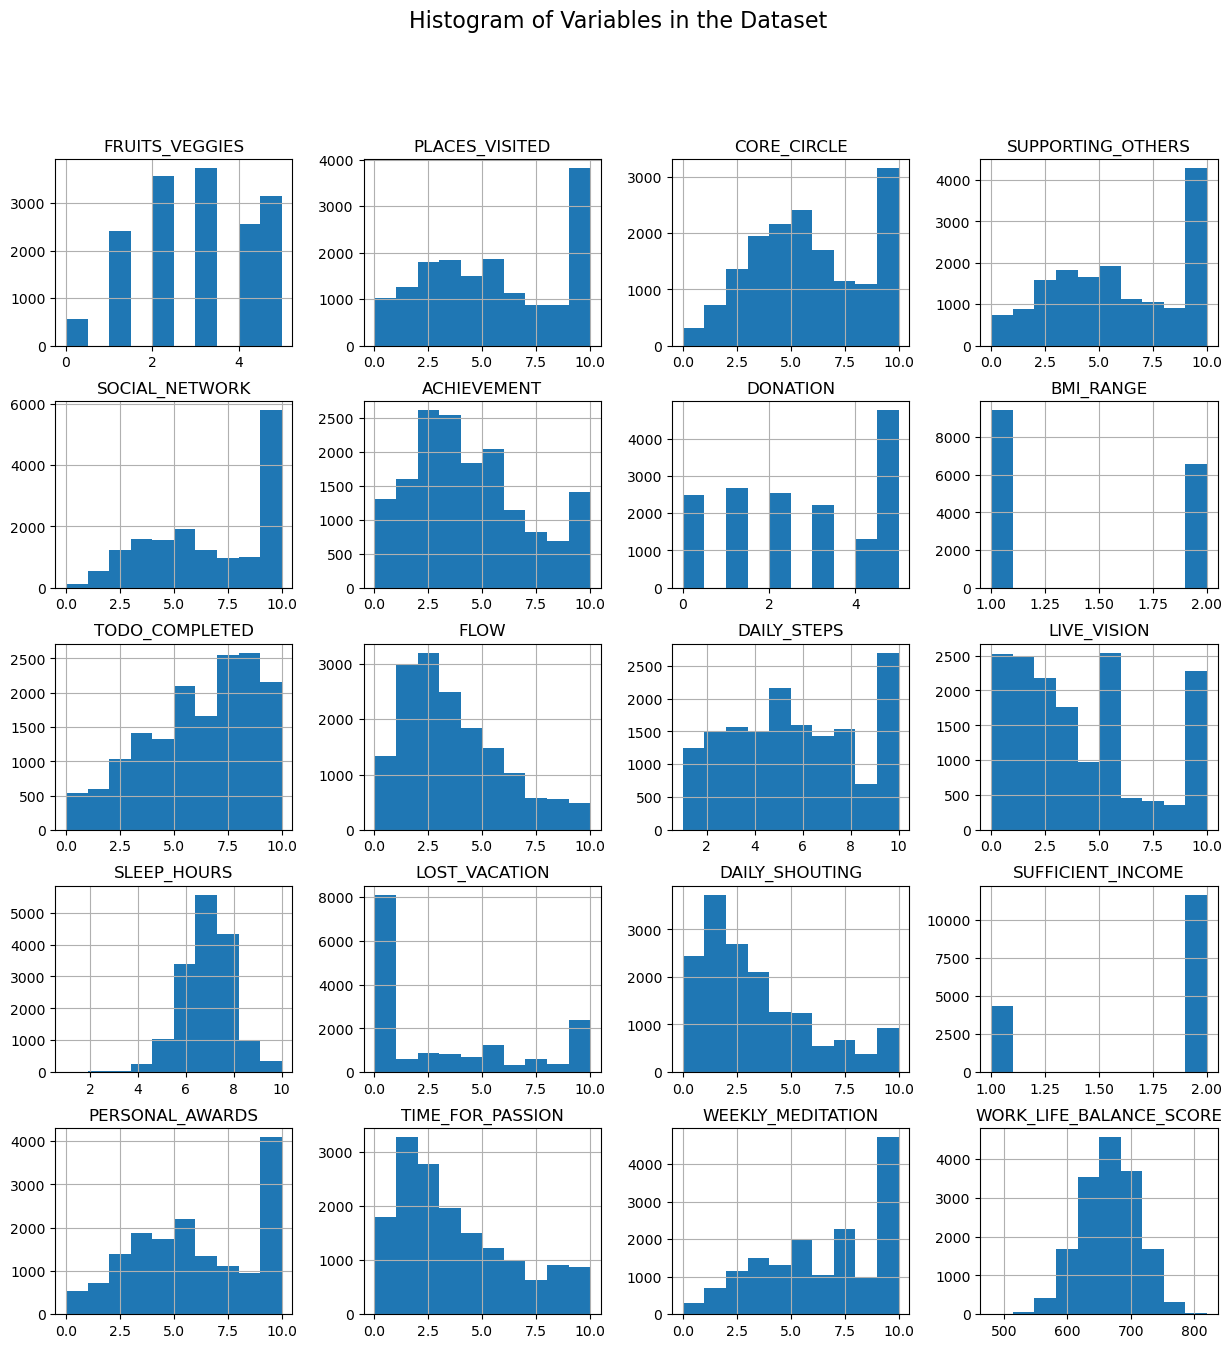

In [ ]:
# Observe the frequency of other variables in the data set
hist = data.hist(figsize = (15, 15))
plt.suptitle("Histogram of Variables in the Dataset", fontsize=16)

Text(0.5, 0.98, 'Histogram of Work-Life Balance Scores by Age')

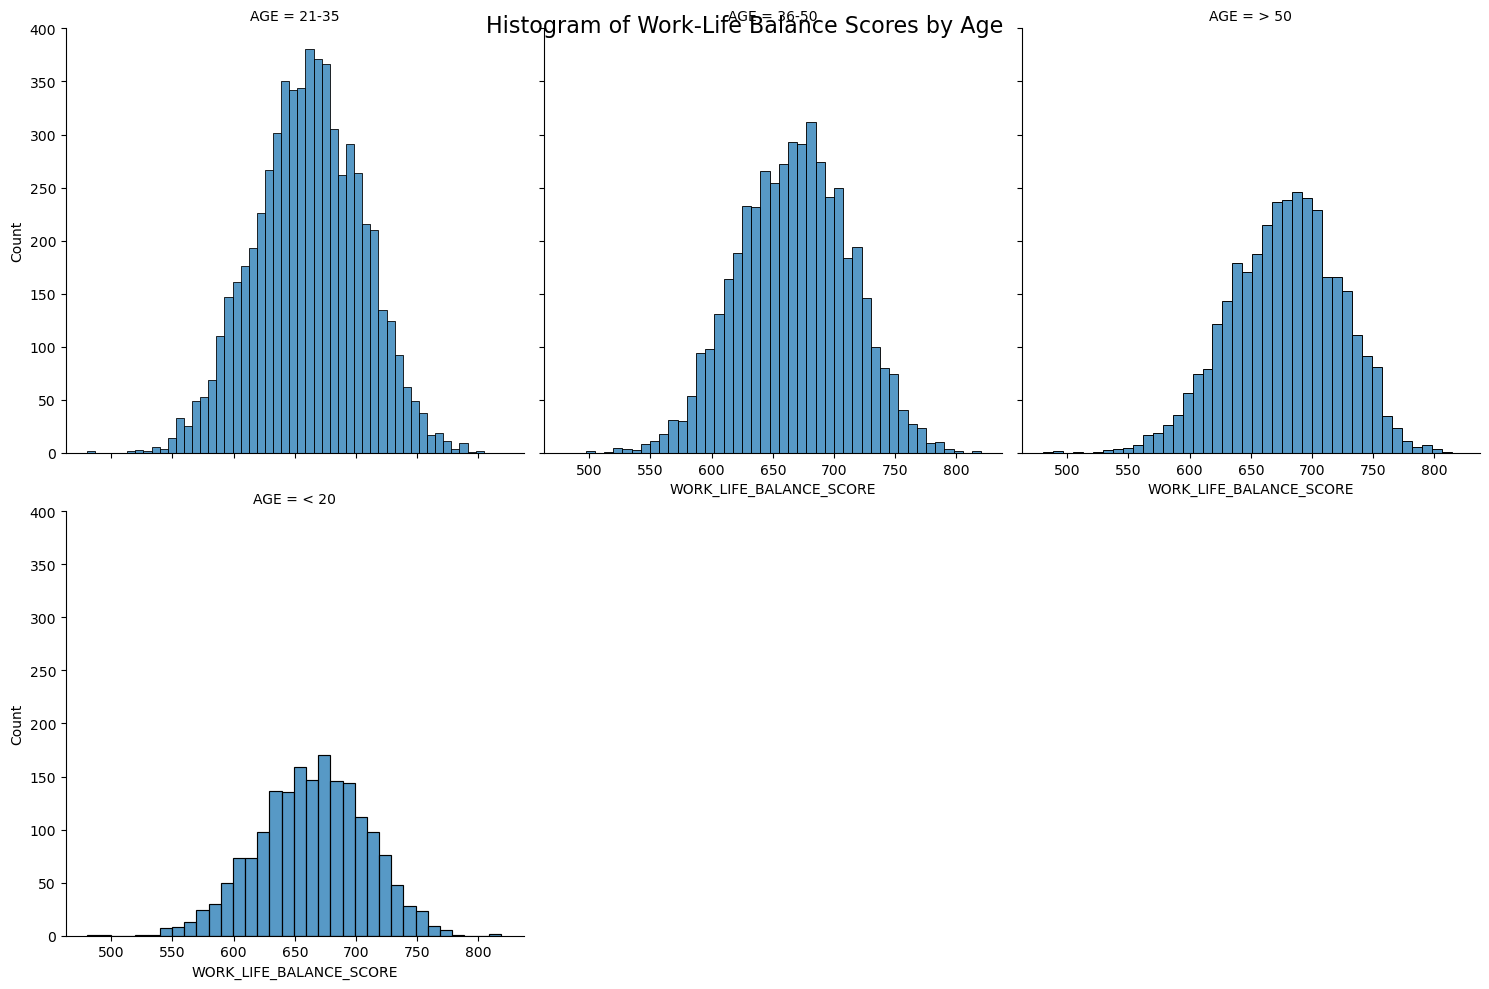

In [ ]:
g = sns.FacetGrid(data, col="AGE", col_wrap=3, height = 5)
g.map(sns.histplot, "WORK_LIFE_BALANCE_SCORE")
g.fig.suptitle("Histogram of Work-Life Balance Scores by Age", fontsize=16)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores')

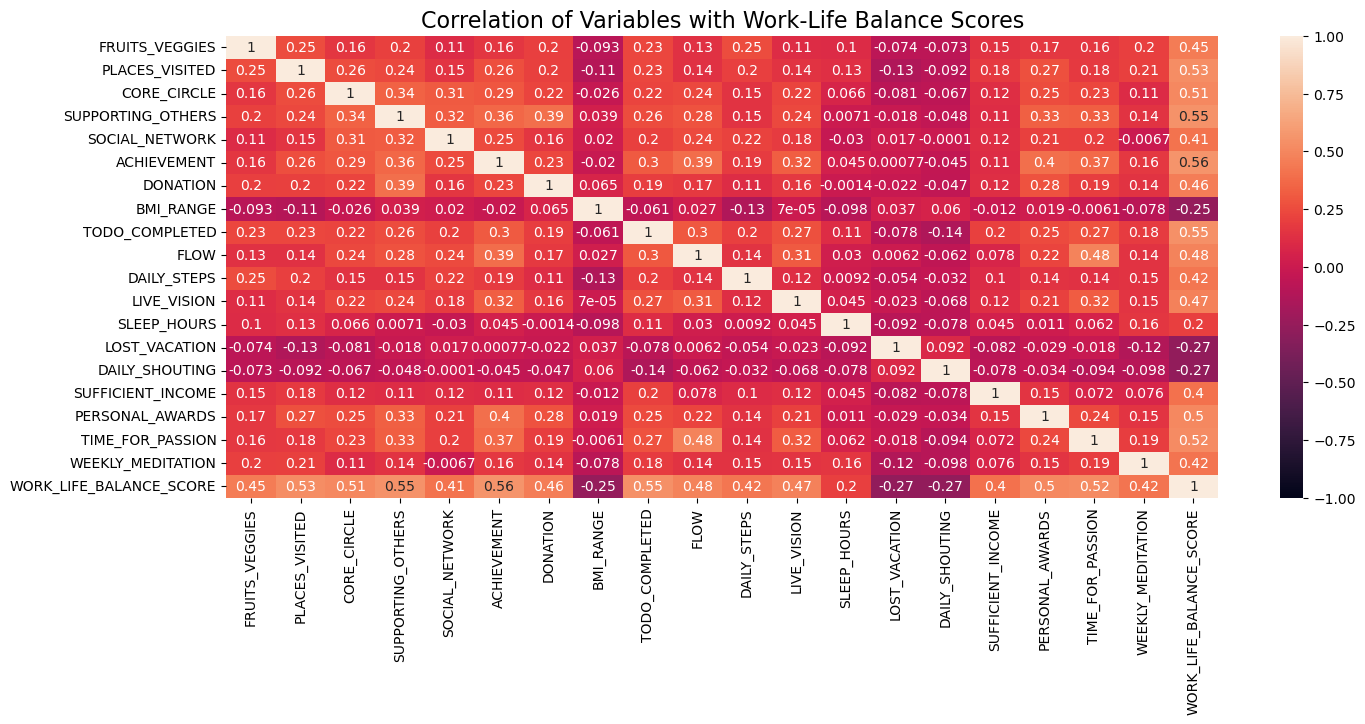

In [ ]:
# Lets see which factors correlate best with work-life balance scores in general
plt.figure(figsize=(16, 6))
hm = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
hm.set_title("Correlation of Variables with Work-Life Balance Scores", fontsize=16)

#### Observations
* Factors that correlate the highest with work-life balance are achievement (r = 0.56), supporting others (r = 0.55), and completing the to-do list (r = 0.55)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores - Female')

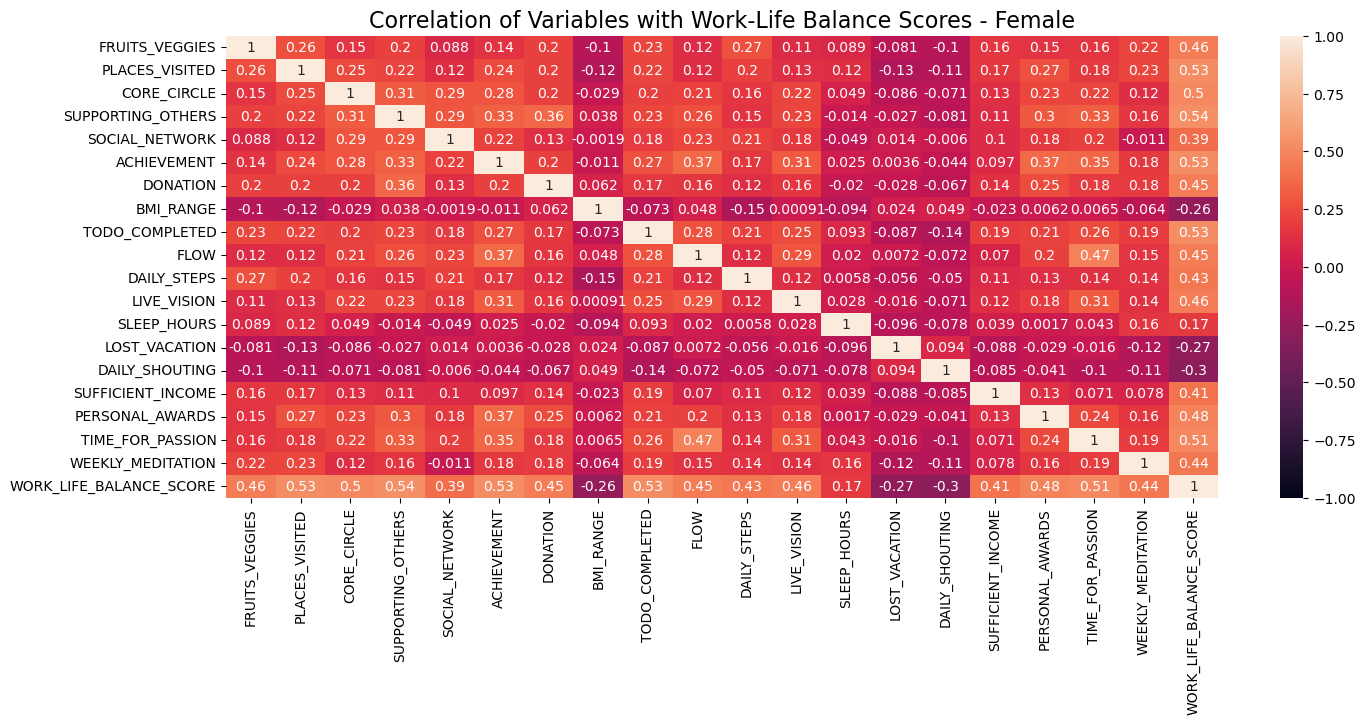

In [ ]:
# Lets subset our data for gender (Female)
dataFemale = data[data["GENDER"] == "Female"]

# Lets see their correlation 
plt.figure(figsize=(16, 6))
h1 = sns.heatmap(dataFemale.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
h1.set_title("Correlation of Variables with Work-Life Balance Scores - Female", fontsize=16)

#### Observations
* The top factors are similar and differ slightly with correlation values only
* Highest: Supporting others (r = 0.54)
* Followed by: places visited, achievement, completed to-do list (r = 0.53)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores - Male')

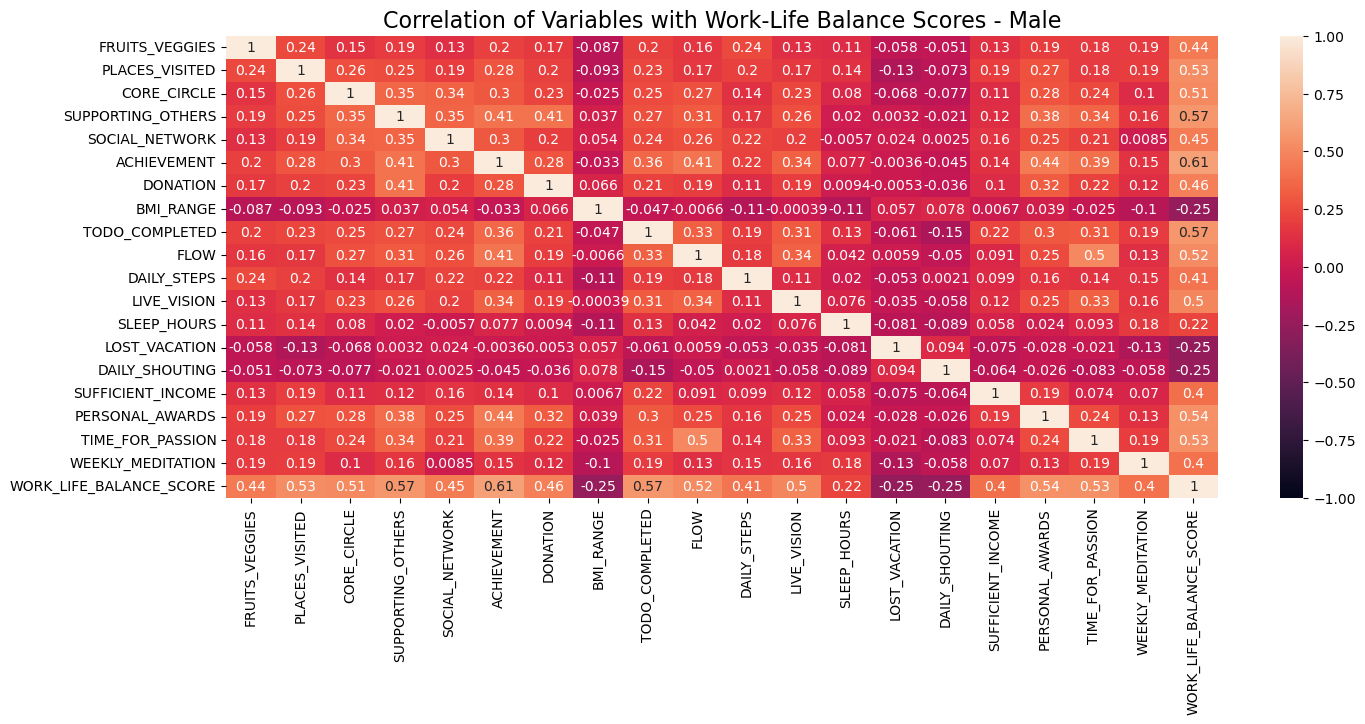

In [ ]:
# Lets subset our data for gender (Male)
dataMale = data[data["GENDER"] == "Male"]

# Lets see their correlation 
plt.figure(figsize=(16, 6))
h2 = sns.heatmap(dataMale.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
h2.set_title("Correlation of Variables with Work-Life Balance Scores - Male", fontsize=16)

#### Observations
* Achievement is the highest (r = 0.61)
* Followed by: supporting others and completed to-do list (r = 0.57) 
* Personal rewards correlated a bit higher (r = 0.54) than places visited (r = 0.53)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores - Less than 20')

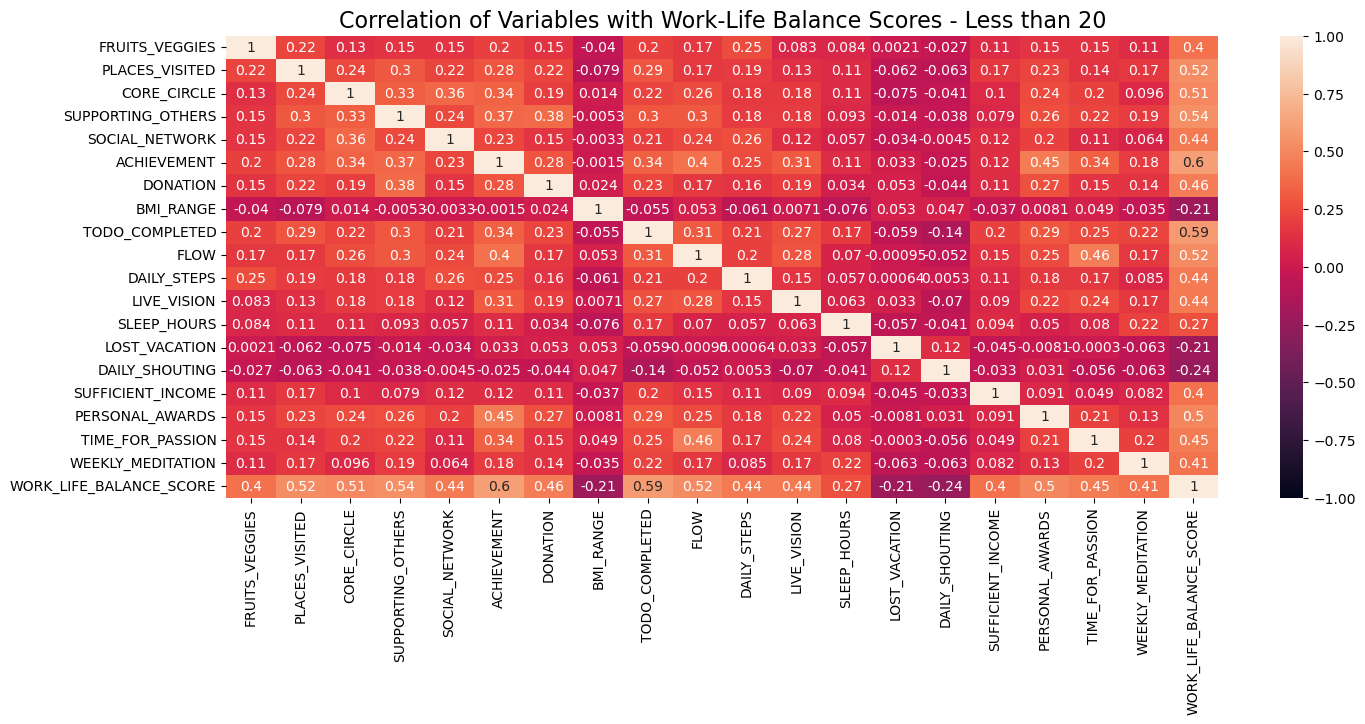

In [ ]:
# Lets subset our data for age (< 20)
data1 = data[data["AGE"] == "< 20"]

# Lets see their correlation 
plt.figure(figsize=(16, 6))
h3 = sns.heatmap(data1.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
h3.set_title("Correlation of Variables with Work-Life Balance Scores - Less than 20", fontsize=16)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores for 21 to 25')

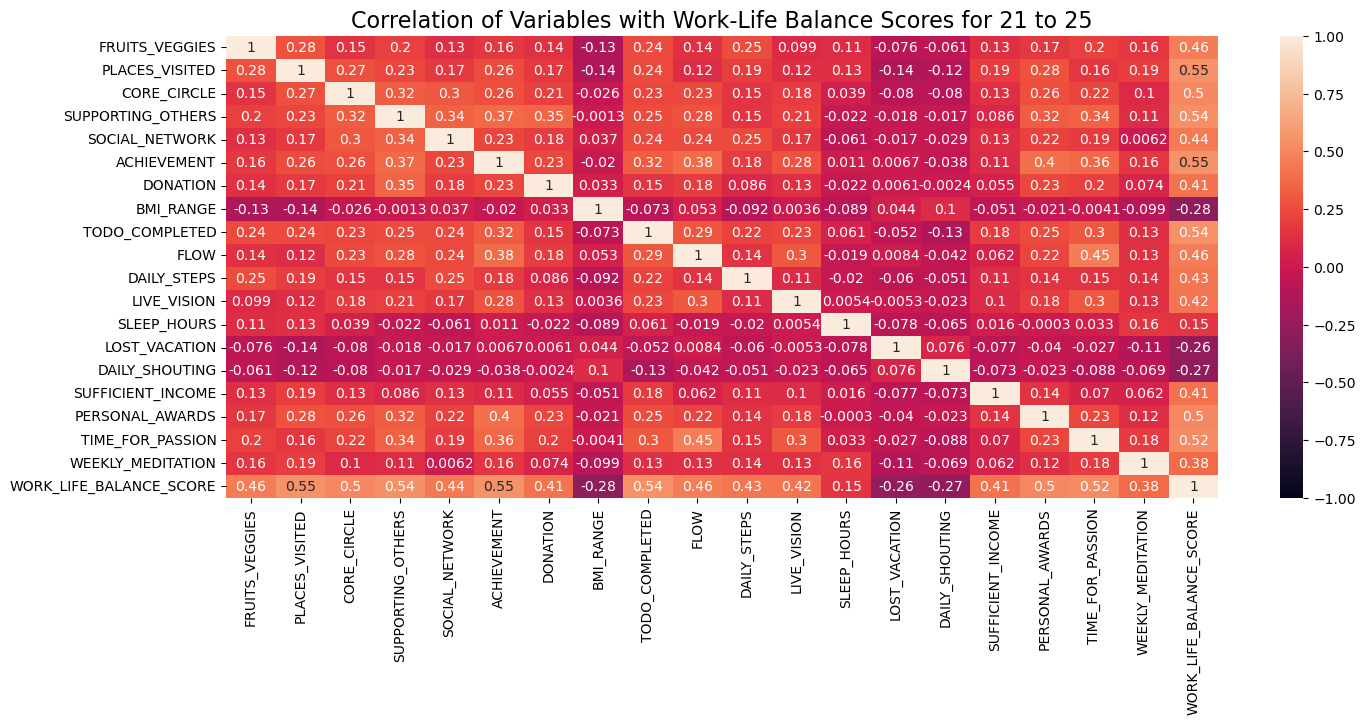

In [ ]:
# Lets subset our data for age (21-35)
data2 = data[data["AGE"] == "21-35"]

# Lets see their correlation 
plt.figure(figsize=(16, 6))
h4 = sns.heatmap(data2.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
h4.set_title("Correlation of Variables with Work-Life Balance Scores for 21 to 25", fontsize=16)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores for 36 -50')

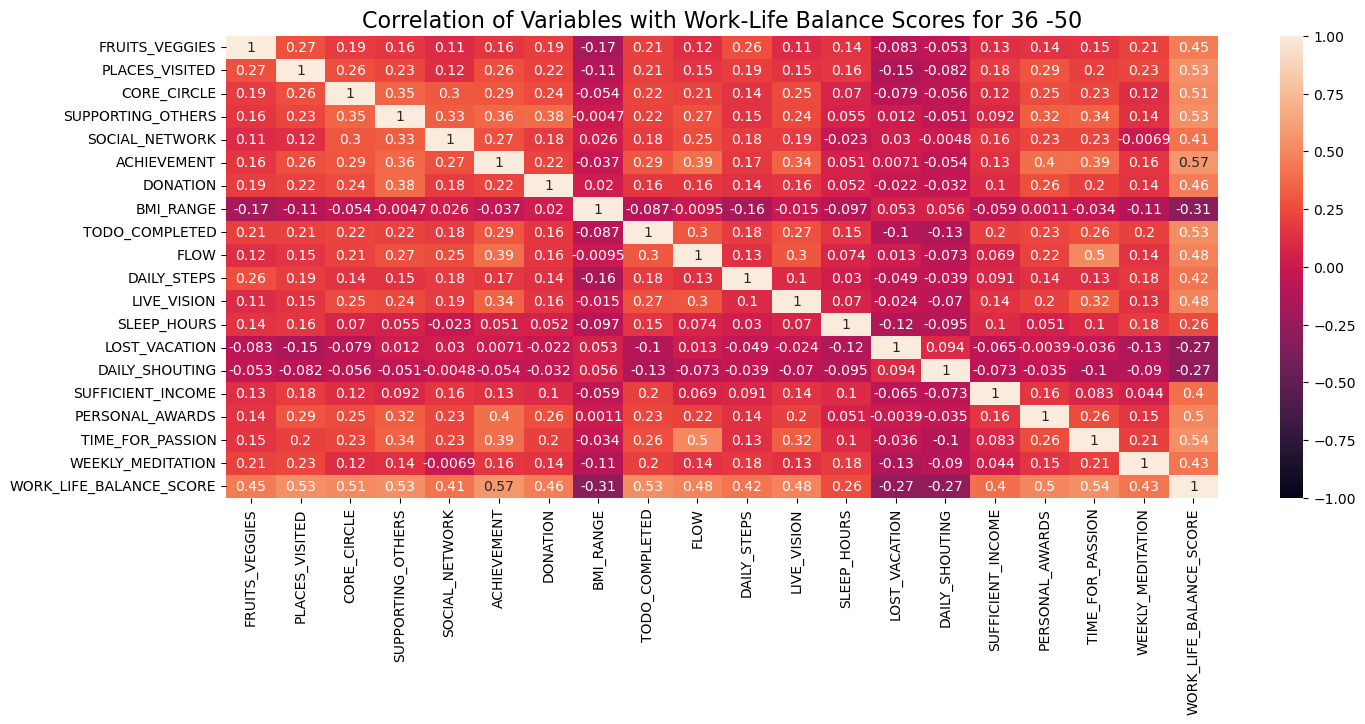

In [ ]:
# Lets subset our data for age (36-50)
data3 = data[data["AGE"] == "36-50"]

# Lets see their correlation 
plt.figure(figsize=(16, 6))
h5 = sns.heatmap(data3.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
h5.set_title("Correlation of Variables with Work-Life Balance Scores for 36 -50", fontsize=16)

Text(0.5, 1.0, 'Correlation of Variables with Work-Life Balance Scores - > 50')

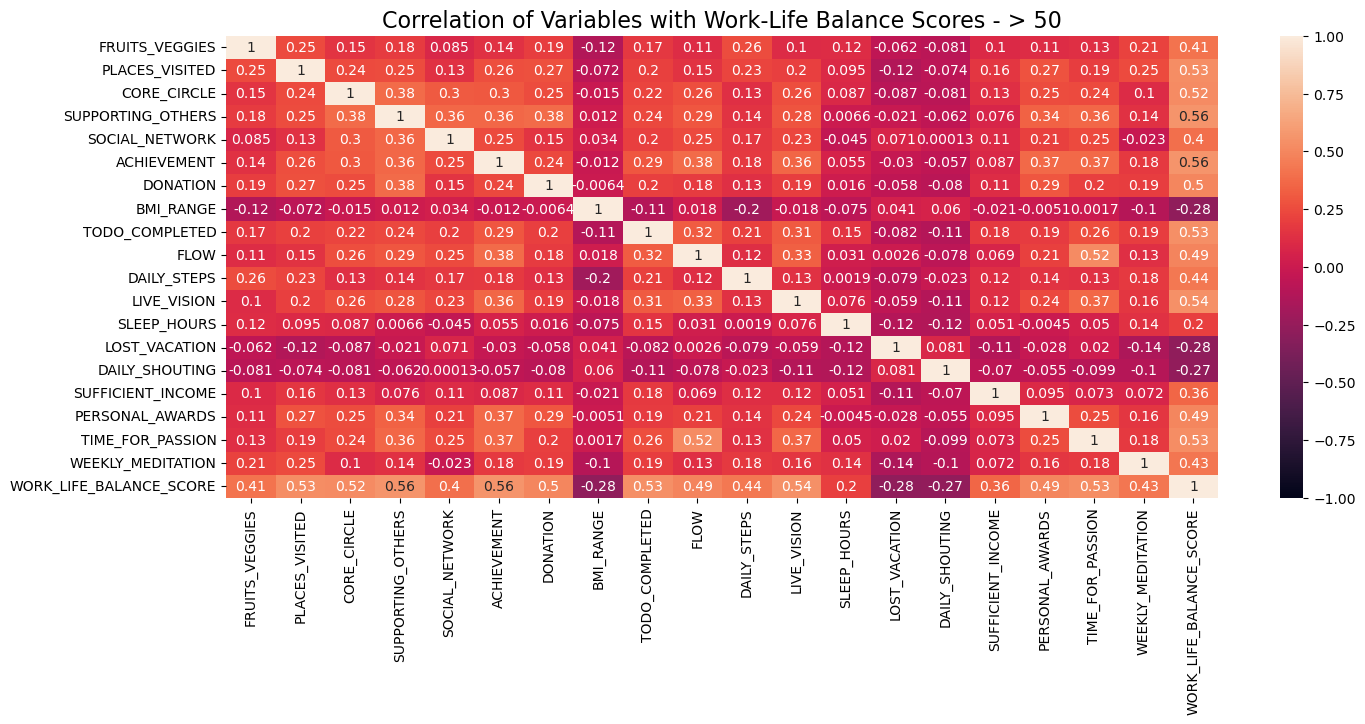

In [ ]:
# Lets subset our data for gender (Age > 50)
data4 = data[data["AGE"] == "> 50"]

# Lets see their correlation 
plt.figure(figsize=(16, 6))
h6 = sns.heatmap(data4.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
h6.set_title("Correlation of Variables with Work-Life Balance Scores - > 50", fontsize=16)

#### Observations for Age
* < 20: Achievement highest (r = 0.66) followed by completing to-do list (r = 0.59)
* 21-35: Achievement and places visit equally highest (r = 0.55)
* 36-50: Achievement highest (r = 0.57), followed by time for passion (r = 0.54)
* > 50: Achievement and supporting others equally highest (r = 0.56)

#### Notes for the next analysis
* Consider the outliers for our demographic variables
* Consider a visualization that can more efficiently display those multiple heatmaps between different demographic factors?
* Some factors may need to be reverse-coded

## Milestone 4

**Are there any lifestyle factors that are particularly relevant for certain demographic groups, as noted by the correlation of factors within their group and work-life balance?**

#### Analysis Pipeline
1. Load Data
* Check file types and encodings

2. Clean Data
* Remove the 'Timeline' column since it is not of interest
* Remove any missing data (We have no missing data here)
* There's a row where it's value for the `Daily stress` column is incorrect. I will remove that
* To make it more legible, change the capitalization of the variables

3. Process Data
* Change the data type of the `Daily Stress` variable to numeric and `Age` to categorical
* Rename the categories for the `Age` variable 
* Remove the outliers in the `Work_life_balance_score` variable, since that is our "observed variable"

4. Wrangle Data 
* Restructure the data format by resetting index

In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 

In [ ]:
import sys
sys.path.append('code')
from project_functions2 import load_clean_process
df = load_clean_process("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")

#### Processing Data

To understand more about are data, we would obtain the summary statistics for all the variables. We want to obtain their basic characteristics to provide an overview of the dataset, including the spread and descriptive statistics such as mean and standard deviation.

In [ ]:
# Obtain a general summary statistic table for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fruits_veggies,15971.0,2.922672,1.442739,0.0,2.0,3.0,4.0,5.0
Daily_stress,15971.0,2.791685,1.367801,0.0,2.0,3.0,4.0,5.0
Places_visited,15971.0,5.233235,3.311847,0.0,2.0,5.0,8.0,10.0
Core_circle,15971.0,5.508296,2.840287,0.0,3.0,5.0,8.0,10.0
Supporting_others,15971.0,5.616179,3.241937,0.0,3.0,5.0,9.5,10.0
Social_network,15971.0,6.474047,3.086643,0.0,4.0,6.0,10.0,10.0
Achievement,15971.0,4.000689,2.755912,0.0,2.0,3.0,6.0,10.0
Donation,15971.0,2.715171,1.851556,0.0,1.0,3.0,5.0,5.0
Bmi_range,15971.0,1.410619,0.491962,1.0,1.0,1.0,2.0,2.0
Todo_completed,15971.0,5.745977,2.624179,0.0,4.0,6.0,8.0,10.0


In [ ]:
# Obtaining summary statistic table for categorical variables
df.describe(exclude = "number").T

,count,unique,top,freq
Age,15971,4,21-35,6107
Gender,15971,2,Female,9858


In [ ]:
# Group by gender and age to obtain descriptive statistics
dtaGroup = df.groupby(by=['Gender', 'Age'])
dtaGroup.describe().T

Gender                              Female                            \
Age                                  21-35        36-50         > 50   
Fruits_veggies          count  3541.000000  2961.000000  2291.000000   
                        mean      2.816718     3.103343     3.472719   
                        std       1.400368     1.387733     1.375558   
                        min       0.000000     0.000000     0.000000   
                        25%       2.000000     2.000000     2.000000   
...                                    ...          ...          ...   
Work_life_balance_score min     547.700000   544.700000   543.900000   
                        25%     634.200000   639.300000   648.400000   
                        50%     663.500000   670.500000   679.850000   
                        75%     693.200000   700.325000   710.200000   
                        max     787.500000   787.500000   790.900000   

Gender                                             Male               \
Age                                   < 20        21-35        36-50   
Fruits_veggies          count  1065.000000  2566.000000  1694.000000   
                        mean      2.748357     2.517927     2.833530   
                        std       1.424992     1.454800     1.435985   
                        min       0.000000     0.000000     0.000000   
                        25%       2.000000     1.000000     2.000000   
...                                    ...          ...          ...   
Work_life_balance_score min     544.300000   544.500000   549.000000   
                        25%     635.200000   629.075000   629.075000   
                        50%     665.700000   660.500000   663.900000   
                        75%     695.300000   690.425000   697.550000   
                        max     777.100000   790.900000   790.500000   

Gender                                                  
Age                                   > 50        < 20  
Fruits_veggies          count  1099.000000  754.000000  
                        mean      3.139217    2.547745  
                        std       1.376256    1.481529  
                        min       0.000000    0.000000  
                        25%       2.000000    1.000000  
...                                    ...         ...  
Work_life_balance_score min     546.000000  542.400000  
                        25%     644.600000  633.500000  
                        50%     680.500000  666.650000  
                        75%     705.700000  695.100000  
                        max     790.700000  787.700000  

[168 rows x 8 columns]

Text(0.5, 1.0, 'Frequency of Demographic Variables - Age and Gender')

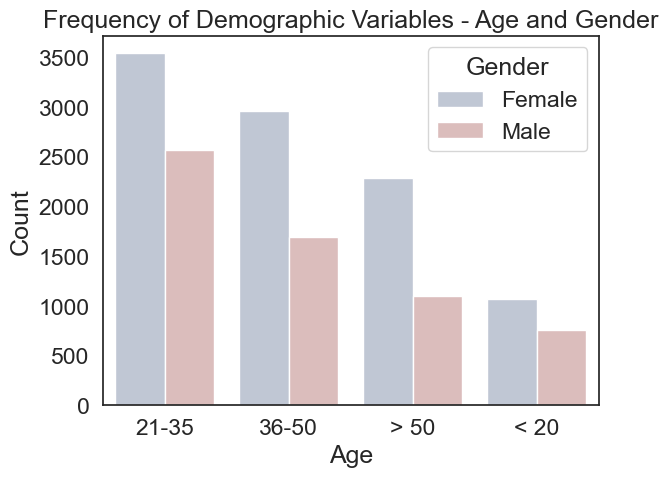

In [ ]:
# Observe count of our 2 demographic variables of interest
df['Gender'].value_counts()
sns.set_theme(style = "white", font_scale = 1.5)
plot = sns.countplot(data = df, x = 'Age', hue = 'Gender', palette = 'vlag').set(ylabel='Count')
plt.legend(title = 'Gender')
plt.title('Frequency of Demographic Variables - Age and Gender')

# Since we want to group them by gender and age, we visualize them separately
# from the other variables (i.e., factors)

Since we want to identify which factors correlate best with the work-life balance score, it becomes important to identify the outliers that exist in the work-life balance variable and remove them. 

In [ ]:
# Observing the variable's statistics
df['Work_life_balance_score'].describe()

count    15900.000000
mean       667.004887
std         44.115086
min        542.400000
25%        636.300000
50%        667.700000
75%        698.500000
max        790.900000
Name: Work_life_balance_score, dtype: float64

#### Observing Outliers
Since we have removed the outliers in the Work-Life Balance Score, we will observe how the distribution looks like after removing them using the IQR method.

Text(0, 0.5, 'Age')

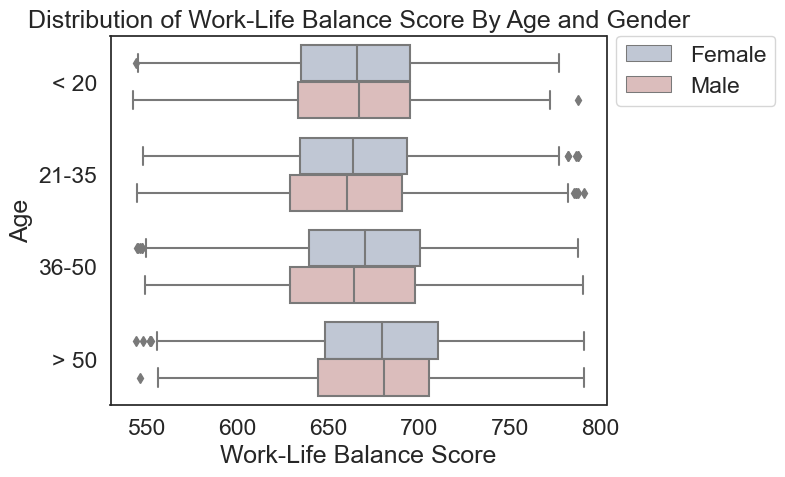

In [ ]:
# A visual representation of our outliers by demographic factors
sns.set_theme(style = "white", font_scale = 1.5)
sns.boxplot(df, x = "Work_life_balance_score", y = "Age",order = ['< 20', '21-35', '36-50', '> 50'], palette = "vlag", hue = "Gender")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Distribution of Work-Life Balance Score By Age and Gender')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Age')


#### Exploratory Data Analysis

Before we conduct the correlations, I want to observe how the work-life balance scores differ by age and by gender respectively.

Text(0.5, 1.0, 'Distribution of Work-life Balance Scores by Age Group')

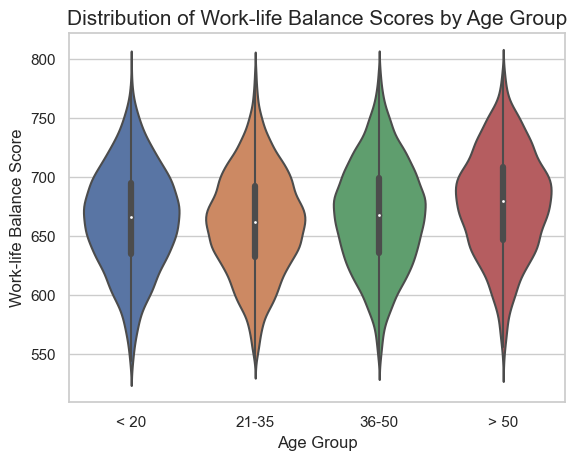

In [ ]:
sns.set(style = "whitegrid")
order = ['< 20', '21-35', '36-50', '> 50']

sns.violinplot(x='Age', y='Work_life_balance_score', data=df, order=order)

# Set the axis labels
plt.xlabel('Age Group')
plt.ylabel('Work-life Balance Score')
plt.title('Distribution of Work-life Balance Scores by Age Group', fontsize = 15)

Text(0.5, 1.0, 'Distribution of Work-life Balance Scores by Gender')

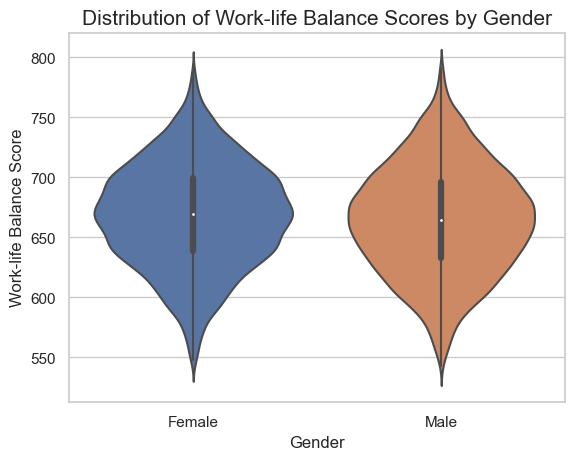

In [ ]:
sns.set(style = "whitegrid")


sns.violinplot(x='Gender', y='Work_life_balance_score', data=df)

# Set the axis labels
plt.xlabel('Gender')
plt.ylabel('Work-life Balance Score')
plt.title('Distribution of Work-life Balance Scores by Gender', fontsize = 15)

#### Observations
It seems that the distribution of work-life balance scores do not differ as much in between age groups and between gender. 
However, gender seems to have a wider violin plot, meaning that there is greater variabililty in the distribution of data for gender than age group. 

#### Correlation Matrix for Gender

In [ ]:
# Select columns containing lifestyle variables
var = [col for col in df.columns if col != 'Age' and col != 'Gender']

# Create separate correlation matrices for each gender
corr_female = df.loc[df['Gender'] == 'Female'][var].corr()
corrF = corr_female['Work_life_balance_score'].abs().sort_values(ascending=False)
corr_male = df.loc[df['Gender'] == 'Male'][var].corr()
corrM = corr_male['Work_life_balance_score'].abs().sort_values(ascending=False)

In [ ]:
corrF

Work_life_balance_score    1.000000
Supporting_others          0.530944
Places_visited             0.524192
Achievement                0.523853
Todo_completed             0.519208
Time_for_passion           0.503138
Core_circle                0.495141
Personal_awards            0.476029
Live_vision                0.454825
Fruits_veggies             0.454014
Donation                   0.448833
Flow                       0.446968
Daily_steps                0.428328
Weekly_meditation          0.427620
Sufficient_income          0.403184
Social_network             0.380629
Daily_stress               0.379978
Daily_shouting             0.282833
Lost_vacation              0.264389
Bmi_range                  0.250654
Sleep_hours                0.160439
Name: Work_life_balance_score, dtype: float64

In [ ]:
corrM

Work_life_balance_score    1.000000
Achievement                0.603723
Supporting_others          0.562485
Todo_completed             0.559761
Personal_awards            0.532591
Time_for_passion           0.526237
Places_visited             0.520534
Flow                       0.506430
Core_circle                0.504105
Live_vision                0.493355
Donation                   0.456214
Social_network             0.434034
Fruits_veggies             0.425436
Daily_steps                0.405914
Weekly_meditation          0.389905
Sufficient_income          0.388791
Daily_stress               0.339890
Lost_vacation              0.246997
Bmi_range                  0.237056
Daily_shouting             0.232007
Sleep_hours                0.211691
Name: Work_life_balance_score, dtype: float64

#### Observations
* Female Top 5 Correlations: Supporting others > Places visited > Achievement > To-do completed > Time for passion
* Male Top 5 Correlations: Achievment > Supporting others > To-do completed > Personal awards > Time for passion 

#### Visualizing Top 5 Correlations for Each Gender Group

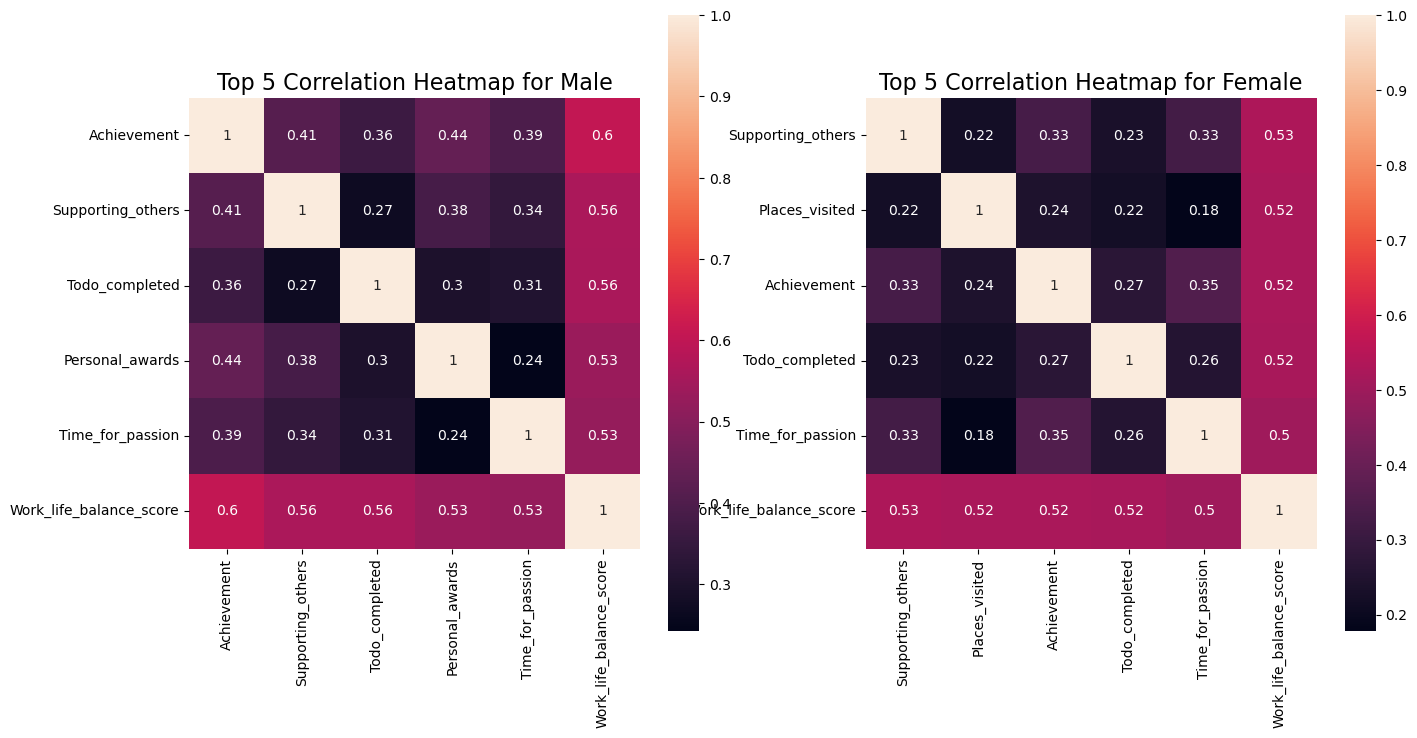

<Figure size 640x480 with 0 Axes>

In [ ]:
varM = ['Achievement', 'Supporting_others', 'Todo_completed', 'Personal_awards', 'Time_for_passion', 'Work_life_balance_score']
corr_subsetM = df.loc[df['Gender'] == 'Male'][varM].corr()

varF = ['Supporting_others',"Places_visited", "Achievement", 'Todo_completed', 'Time_for_passion', 'Work_life_balance_score']
corr_subsetF = df.loc[df['Gender'] == 'Female'][varF].corr()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(corr_subsetM, annot=True, square=True, ax=axs[0])
axs[0].set_title('Top 5 Correlation Heatmap for Male', fontsize=16)

sns.heatmap(corr_subsetF, annot=True, square=True, ax=axs[1])
axs[1].set_title('Top 5 Correlation Heatmap for Female', fontsize=16)

plt.show()
plt.savefig('../images/rq02_1.png', bbox_inches='tight')

#### Correlation Matrix for Age Groups

In [ ]:
var = [col for col in df.columns if col not in ['Age', 'Gender']]

# Create separate correlation matrices for each age group
corrL20x = df.loc[(df['Age'] == '< 20')][var].corr()
corrL20 = corrL20x['Work_life_balance_score'].abs().sort_values(ascending=False)
corr21_35x = df.loc[(df['Age'] == '21-35')][var].corr()
corr21_35 = corr21_35x['Work_life_balance_score'].abs().sort_values(ascending=False)
corr36_50x = df.loc[(df['Age'] == '36-50')][var].corr()
corr36_50 = corr36_50x['Work_life_balance_score'].abs().sort_values(ascending=False)
corrM50x = df.loc[(df['Age'] == '> 50')][var].corr()
corrM50 = corrM50x['Work_life_balance_score'].abs().sort_values(ascending=False)


In [ ]:
corrL20

Work_life_balance_score    1.000000
Achievement                0.600317
Todo_completed             0.583155
Supporting_others          0.530706
Places_visited             0.520158
Flow                       0.515612
Core_circle                0.499192
Personal_awards            0.491542
Donation                   0.451100
Time_for_passion           0.438541
Daily_steps                0.436914
Live_vision                0.432054
Social_network             0.431852
Sufficient_income          0.399228
Weekly_meditation          0.398661
Fruits_veggies             0.388365
Daily_stress               0.360223
Sleep_hours                0.252544
Daily_shouting             0.222956
Lost_vacation              0.207579
Bmi_range                  0.191173
Name: Work_life_balance_score, dtype: float64

In [ ]:
corr21_35

Work_life_balance_score    1.000000
Achievement                0.546354
Places_visited             0.542753
Supporting_others          0.535375
Todo_completed             0.532583
Time_for_passion           0.516492
Core_circle                0.498733
Personal_awards            0.495155
Flow                       0.455400
Fruits_veggies             0.450841
Social_network             0.434958
Live_vision                0.422298
Daily_steps                0.418759
Donation                   0.401414
Sufficient_income          0.400789
Weekly_meditation          0.377103
Daily_stress               0.354663
Bmi_range                  0.275284
Daily_shouting             0.259693
Lost_vacation              0.255838
Sleep_hours                0.137878
Name: Work_life_balance_score, dtype: float64

In [ ]:
corr36_50

Work_life_balance_score    1.000000
Achievement                0.559774
Time_for_passion           0.532342
Supporting_others          0.527405
Places_visited             0.527154
Todo_completed             0.515104
Core_circle                0.504634
Personal_awards            0.489113
Live_vision                0.473157
Flow                       0.470014
Donation                   0.450751
Fruits_veggies             0.440986
Weekly_meditation          0.415818
Daily_steps                0.411310
Social_network             0.400513
Sufficient_income          0.387518
Daily_stress               0.361904
Bmi_range                  0.303659
Lost_vacation              0.263087
Daily_shouting             0.251938
Sleep_hours                0.246432
Name: Work_life_balance_score, dtype: float64

In [ ]:
corrM50

Work_life_balance_score    1.000000
Supporting_others          0.553661
Achievement                0.552757
Live_vision                0.534175
Todo_completed             0.521494
Time_for_passion           0.520746
Places_visited             0.520346
Core_circle                0.509080
Personal_awards            0.489700
Donation                   0.489079
Flow                       0.477365
Daily_steps                0.433488
Weekly_meditation          0.413573
Fruits_veggies             0.402575
Social_network             0.383180
Sufficient_income          0.342371
Daily_stress               0.337769
Bmi_range                  0.272397
Lost_vacation              0.262650
Daily_shouting             0.251123
Sleep_hours                0.177423
Name: Work_life_balance_score, dtype: float64

#### Observations

* Less than 20: Achievement > To-do completed > Supporting others > Places visited > Flow
* 21 - 35: Achievement > Places visited > Supporting others > To-do completed > Time for passion
* 36 - 50: Achievment > Time for passion > Supporting others > Places visited > To-do completed 
* More than 50: Supporting others > Achievement > Live vision > To-do completed > Time for passion 

#### Visualizing Top 5 Correlations for Each Age Group

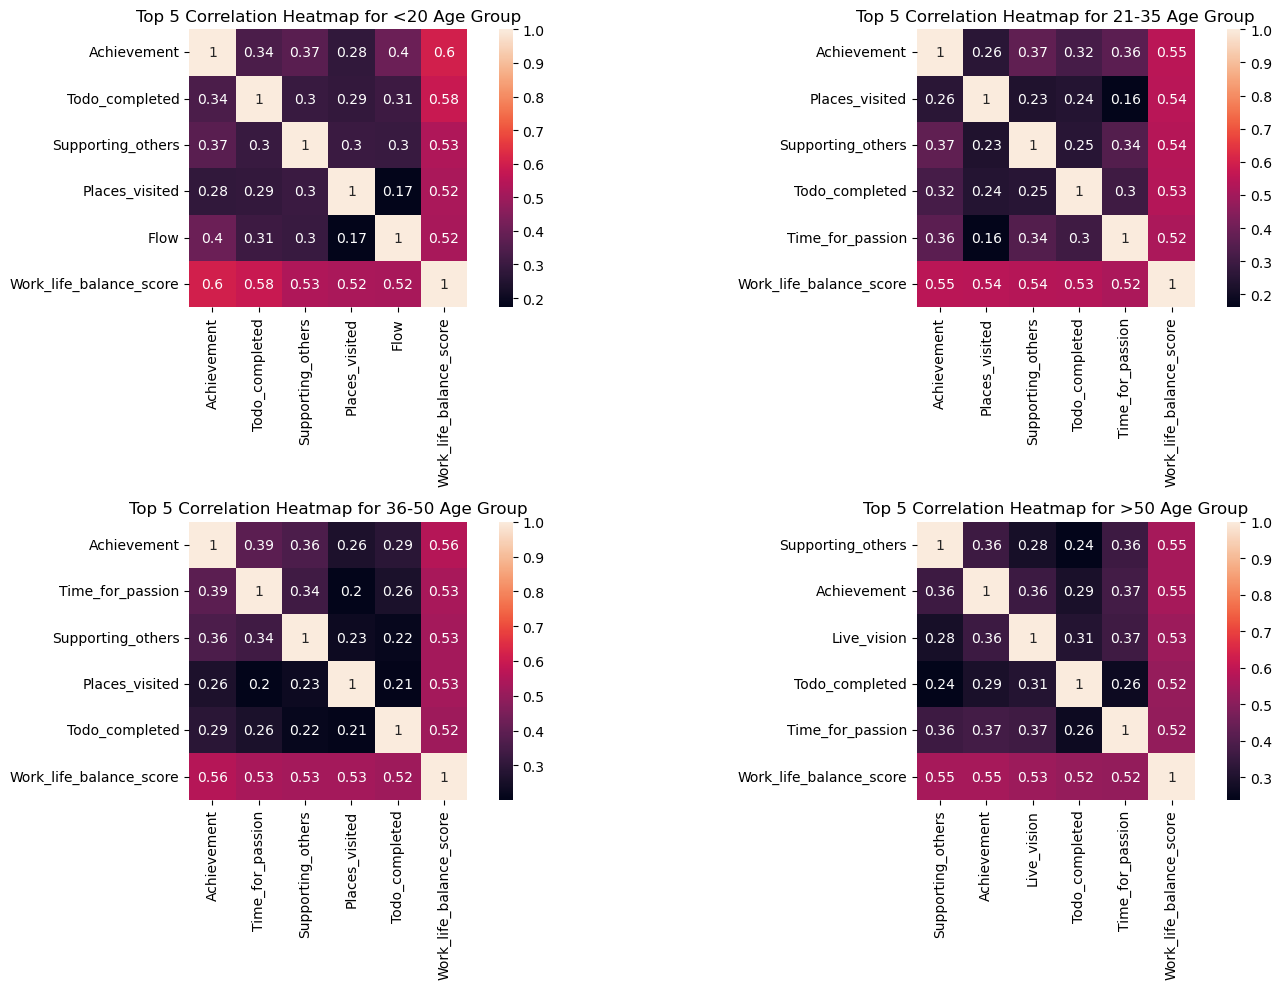

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define variables and subsets for each age group
varA = ['Achievement', 'Todo_completed', 'Supporting_others', 'Places_visited', 'Flow', 'Work_life_balance_score']
corr_subsetA = df.loc[(df['Age'] == '< 20')][varA].corr()

varB = ['Achievement', 'Places_visited', 'Supporting_others', 'Todo_completed', 'Time_for_passion', 'Work_life_balance_score']
corr_subsetB = df.loc[(df['Age'] == '21-35')][varB].corr()

varC = ['Achievement', 'Time_for_passion', 'Supporting_others', 'Places_visited','Todo_completed', 'Work_life_balance_score']
corr_subsetC = df.loc[(df['Age'] == '36-50')][varC].corr()

varD = ['Supporting_others', 'Achievement','Live_vision', 'Todo_completed', 'Time_for_passion', 'Work_life_balance_score']
corr_subsetD = df.loc[(df['Age'] == '> 50')][varD].corr()

# Create a multi-panel heatmap
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.heatmap(corr_subsetA, annot=True, square=True, ax=axs[0,0])
axs[0,0].set_title('Top 5 Correlation Heatmap for <20 Age Group')

sns.heatmap(corr_subsetB, annot=True, square=True, ax=axs[0,1])
axs[0,1].set_title('Top 5 Correlation Heatmap for 21-35 Age Group')

sns.heatmap(corr_subsetC, annot=True, square=True, ax=axs[1,0])
axs[1,0].set_title('Top 5 Correlation Heatmap for 36-50 Age Group')

sns.heatmap(corr_subsetD, annot=True, square=True, ax=axs[1,1])
axs[1,1].set_title('Top 5 Correlation Heatmap for >50 Age Group')

plt.tight_layout()
plt.show()
plt.savefig('../images/rq02_2.png', bbox_inches='tight')


#### Conclusion
Based on the correlation analysis and heatmap plots, it can be concluded that there is an overall consistency in the correlated lifestyle factors with work-life balance across different demographic groups. To be specific, achievement and supporting others emerged as two of the top five most relevant factors for both gender and age groups. Further analysis may be needed to consider whether the small differences in correlations to be significant. Nonetheless, the current findings provided valuable insight into the lifestyle factors that individuals may target in striving for an improved work-life balance.

#### Milestone 5
Exporting Data

In [ ]:
df.to_csv('../data/processed/irdina_tableau_data.)

,Fruits_veggies,Daily_stress,Places_visited,Core_circle,Supporting_others,Social_network,Achievement,Donation,Bmi_range,Todo_completed,...,Sleep_hours,Lost_vacation,Daily_shouting,Sufficient_income,Personal_awards,Time_for_passion,Weekly_meditation,Age,Gender,Work_life_balance_score
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36-50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36-50,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,36-50,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,> 50,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,> 50,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,3,3,0,4,0,10,0,4,2,8,...,7,0,1,1,5,2,5,> 50,Female,644.5
15967,3,3,6,8,7,4,6,3,1,7,...,6,0,0,2,10,5,8,21-35,Female,714.9
15968,4,3,0,10,10,8,6,5,1,7,...,7,0,1,2,10,1,10,21-35,Male,716.6
15969,1,1,10,8,2,7,3,2,1,6,...,8,7,2,2,1,6,8,21-35,Female,682.0
